# Generating Wolfram ECA's for all rules

## Setting up packages

In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Distributed")
Pkg.add("Plots")

  Activating project at `c:\School\BS Thesis\src`
    Updating registry at `C:\Users\ioakimsy\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\School\BS Thesis\src\Project.toml`
  No Changes to `C:\School\BS Thesis\src\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\School\BS Thesis\src\Project.toml`
  No Changes to `C:\School\BS Thesis\src\Manifest.toml`


In [2]:
using Plots
using Distributed

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1664


## Conversion of rule number to set of state rules

In [3]:
#Conversion of rule number to state set
function rule_to_state(rule)
    answer = zeros(Int64,1,8)
    if rule>=0 && rule<=255
        for i in 7:-1:0
            if rule>=2^i
                answer[i+1]=1
                rule = rule-2^i
            end
        end
        return reverse(answer)
    end
end


rule_to_state (generic function with 1 method)

## Generating the next generation given the previous generation

In [4]:
function generate_next_generation(prev_generation,array_size,state_array)
    states = [
            [1,1,1],
            [1,1,0],
            [1,0,1],
            [1,0,0],
            [0,1,1],
            [0,1,0],
            [0,0,1],
            [0,0,0]
            ]
    next_generation = zeros(Int64,1,array_size)
    Threads.@threads for i in range(2,array_size-1)
        neighborhood = prev_generation[i-1:i+1]

        if i==2
            neighborhood[1] = prev_generation[array_size-1]
        elseif i==(array_size-1)
            neighborhood[3] = prev_generation[2]
        end

        Threads.@threads for state_number in 1:1:8
            if neighborhood == states[state_number]
                next_generation[i]=state_array[state_number]
            end
        end
    end
    return next_generation
end


generate_next_generation (generic function with 1 method)

## Generating the whole grid given initial conditions and the rule number

In [5]:
function generate_plot(grid,rule)
    max_generations, array_size = size(grid)
    #println("max generations: ", max_generations, "\ngrid size per generattion: ", array_size)
    state_array = rule_to_state(rule)
    #println("applying rule ",rule)

    steady_state = false

    current_generation_number = 1
    while current_generation_number < max_generations-1 && steady_state == false
        current_generation = grid[current_generation_number,:]
        next_generation = generate_next_generation(current_generation,array_size,state_array)
        #println("generating generation:", current_generation_number+1)
        grid[current_generation_number+1,:] = next_generation
        #println("prev generation: ", grid[current_generation_number,:])
        #println("next generation: ", grid[current_generation_number+1,:])
        #if grid[current_generation_number,:] == grid[current_generation_number+2,:]
            #println("steady state reached after ",current_generation_number," generations")
            #steady_state = true
            #break
        #end
        current_generation_number = current_generation_number + 1

    end

    return grid, current_generation_number

end

generate_plot (generic function with 1 method)

## Generating the plot from parameters: array size, maximum number of generations, and rule number

In [6]:
function wolfram_ECA(array_size,max_generations,rule)
    #Setting up first generation
    ECA_grid = zeros(Int64,max_generations,array_size)

    middle = (array_size+1)/2
    middle = convert(Int,middle)

    first_generation = zeros(Int64, 1, array_size)
    first_generation[middle] = 1

    ECA_grid[1,:] = first_generation

    ECA_grid, number_of_generated_generations = generate_plot(ECA_grid,rule)
    return heatmap(ECA_grid,
            plot_title = "Wolfram ECA Rule $(rule) with $(number_of_generated_generations+1) \ngenerations of $(array_size) length arrays",
            plot_titlefontsize = 24,
            yflip=true,
            aspect_ratio=:equal,
            xlims=(0.5,array_size+0.5),
            showaxis = false, #Removes the axes' black lines
            axis=([], false), #Removes the numbrs on the axis
            ylims=(0.5,number_of_generated_generations+0.5),
            #ylabel = "Number of Generations",
            #dpi=150,
            size=((array_size+50)*5,(number_of_generated_generations+75)*5),
            cbar=false,
            c = palette(:grays,rev=true)
            )

end

wolfram_ECA (generic function with 1 method)

## Saving output figures

In [10]:
#Dimensions and rule number
array_size = 2^7 + 1 #keep this an odd number!
max_generations = 2^7 + 1

for rule in 0:1:255
    savefig(wolfram_ECA(array_size,max_generations,rule),"C:/School/BS Thesis/output/wolfram-ECA-Circular-129x129/rule-$(rule).png")
end

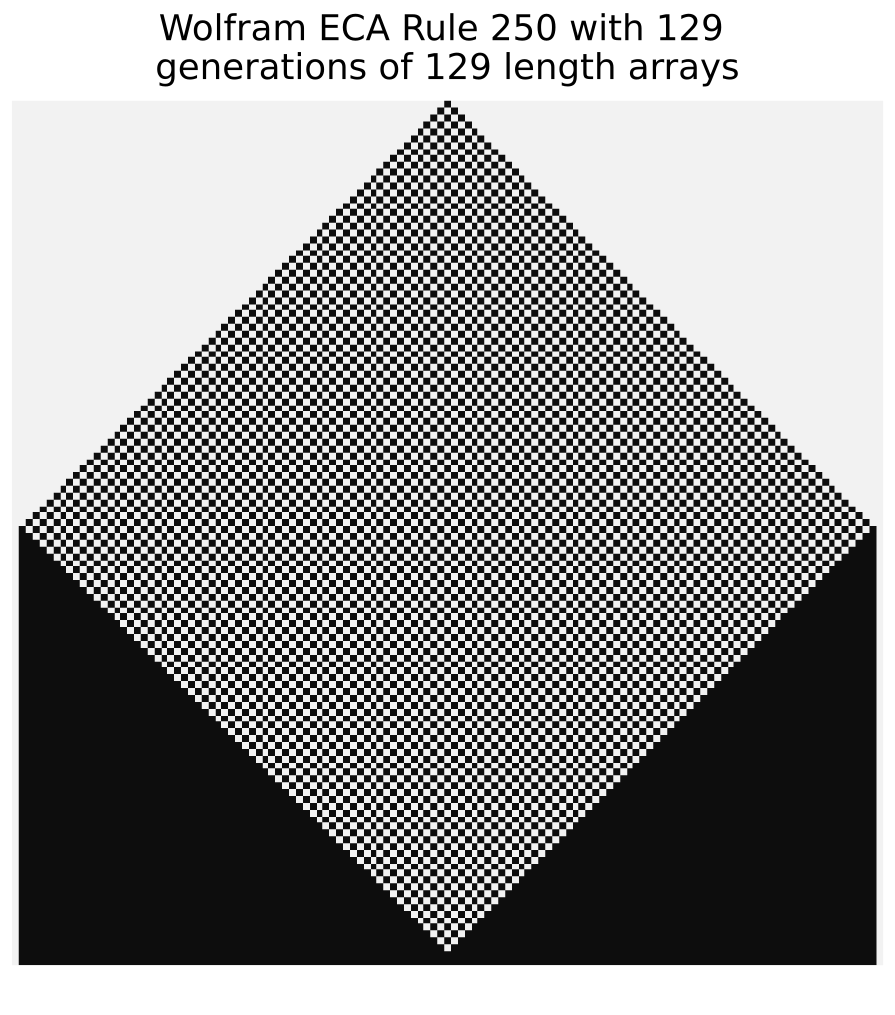

In [8]:
array_size = 2^7 + 1 #keep this an odd number!
max_generations = 2^7 + 1
rule = 250
wolfram_ECA(array_size,max_generations,rule)


In [9]:
Threads.nthreads()

8